# Pre-Class Assignment: Image Data and Preprocessing
In this pre-class assignment we will explore how image data is stored and manipulated in a computer.

# Goals for today's pre-class assignment 

1. [How are images stored in a computer?](#How_are_images_stored_in_a_computer)
3. [Viewing Image Histograms](#Viewing_Image_Histograms)
4. [Histogram Equalization](#Histogram_Equalization)


----

<a name="How_are_images_stored_in_a_computer"></a>
# 1. How are images stored in a computer?

Consider the following video on how colors are represented as numbers.

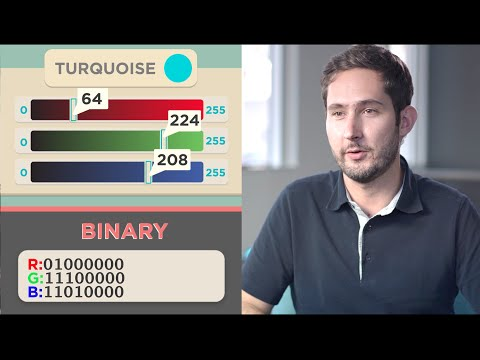

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("15aqFQQVBWU",width=640,height=360, cc_load_policy=True)

The following code reproduces the sliders shown in the videos to represent color:

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
from ipywidgets import interact, fixed
import numpy as np

def showcolor(red,green,blue):
    plt.scatter(1,1, color=(red/255,green/255,blue/255), s=10000 );
    plt.axis('off');
    plt.show();

interact(showcolor, red=(0,255), green=(0,255), blue=(0,255));

interactive(children=(IntSlider(value=127, description='red', max=255), IntSlider(value=127, description='gree…

The following code downloads an image off the internet using the provided URL and stores the image in a variable called ```im```.   **Note:** this image is from https://eyecancer.com/eye-cancer/image-galleries/retinal-tumors/

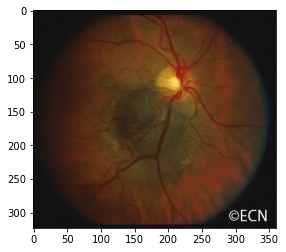

In [3]:
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave

url1 = 'https://goo.gl/mdqgBZ'
file='eye.jpeg'

urlretrieve(url1, file)
im = imread(file)
    
#Show the image
plt.imshow(im);


The image provided above is a three channel RGB (Red, Green, Blue) Image stored as a $row \times cols \times 3$ ```numpy``` array. The following code shows the contribution of the red  green and blue components to the image.

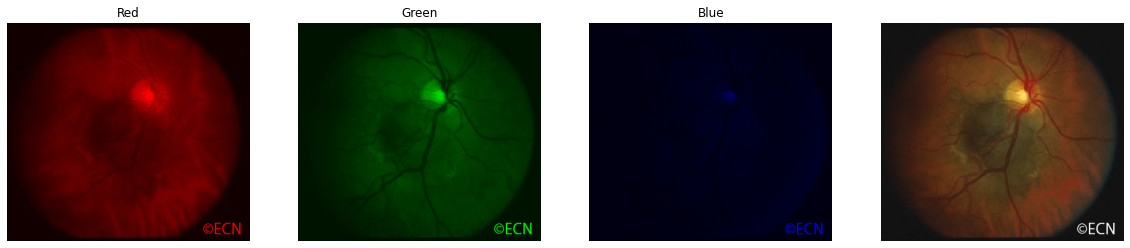

In [4]:
#Simple loop to print out the red, green and blue channels
names = ['Red', 'Green', 'Blue'];
f, ax = plt.subplots(1, 4,figsize=(20,10));

for c in range(3):
    c_im = np.ubyte(np.zeros(im.shape));
    c_im[:,:,c] = im[:,:,c];
    ax[c].imshow(c_im, cmap='gray');
    ax[c].axis('off')
    ax[c].set_title(names[c])

ax[3].imshow(im);
ax[3].axis('off');

The following is an example function that takes an image as an input and returns a color shifted value (similar to the function described in the video). 

----
<a href="Single_Channel_Images"></a>

# 2. Single Channel Images

 In many scientific domains we only deal with a single channel also called a "grayscale" image. The following code converts the RGB to a grayscale.

In [5]:
#Convert color image to grayscale
import skimage.color as color
gray = color.rgb2gray(im)

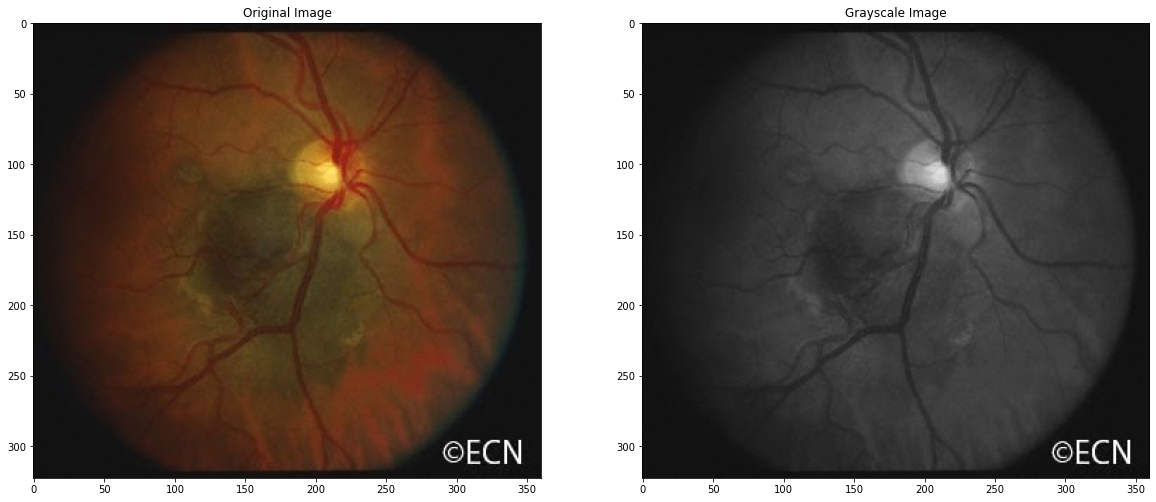

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

ax1.imshow(im)
ax1.set_title('Original Image')
ax2.imshow(gray,cmap='gray')
ax2.set_title('Grayscale Image');

----

<a name="Viewing_Image_Histograms"></a>
# 2. Viewing Image Histograms

>An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

<p style="text-align: right;"> <a href="https://en.wikipedia.org/wiki/Image_histogram">Image histogram - Wikipedia</a></p>
 
The following code snip-its generate histograms for the provided example Image. Note it is common to use a different histogram for each channel. 

Text(0.5, 1.0, 'Historgams for Overlayed Red, Green and Blue Channels of a color image')

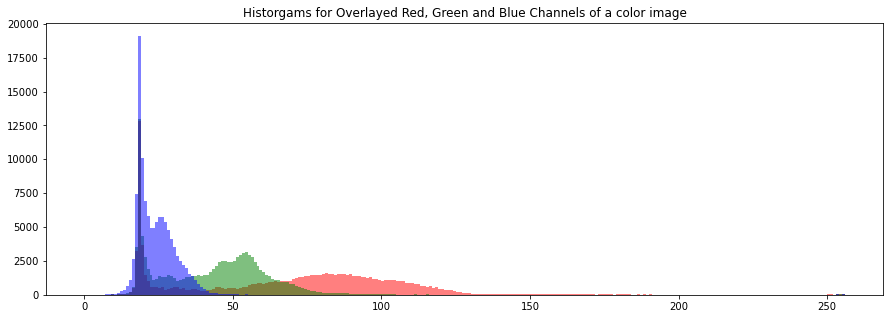

In [7]:
#RGB Histogram snip-it of an image. Each channel calculated separately and displayed in the same image

fig = plt.figure(figsize=(15,5))

plt.hist(im[:,:,0].ravel(), alpha=0.5, bins=256, range=(0, 256), color='red');
plt.hist(im[:,:,1].ravel(), alpha=0.5, bins=256, range=(0, 256), color='green');
plt.hist(im[:,:,2].ravel(), alpha=0.5, bins=256, range=(0, 256), color='blue');
plt.title('Historgams for Overlayed Red, Green and Blue Channels of a color image')

Text(0.5, 1.0, 'Historgams for Grayscale Image')

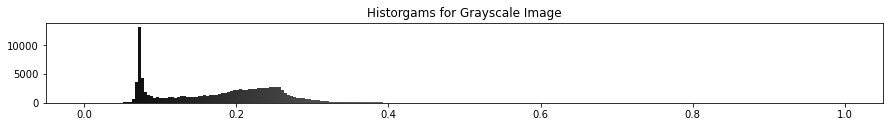

In [8]:
#Histogram snip-it for a grayscale image
import skimage.filters as filters

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(311)  
i = 0
N, bins, patches = ax1.hist(gray.ravel(), bins=255, range=(0, 1), color='gray');
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1
    
plt.title('Historgams for Grayscale Image')

----
<a name="Histogram_Equalization"></a>
# 3. Histogram Equalization

Histogram Equalization is a method that improves the contrast in an image, in order to stretch out the intensity range to fill the available space. 

> This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.

> The method is useful in images with backgrounds and foregrounds that are both bright or both dark. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are over or under-exposed. A key advantage of the method is that it is a fairly straightforward technique and an invertible operator. So in theory, if the histogram equalization function is known, then the original histogram can be recovered. The calculation is not computationally intensive. A disadvantage of the method is that it is indiscriminate. It may increase the contrast of background noise, while decreasing the usable signal.

<p style="text-align: right;"> <a href="https://en.wikipedia.org/wiki/Histogram_equalization">Histogram Equalization - Wikipedia</a></p>

This section shows different types of histogram equalizations on both grayscale and color images:

### Grayscale Histogram Equalization

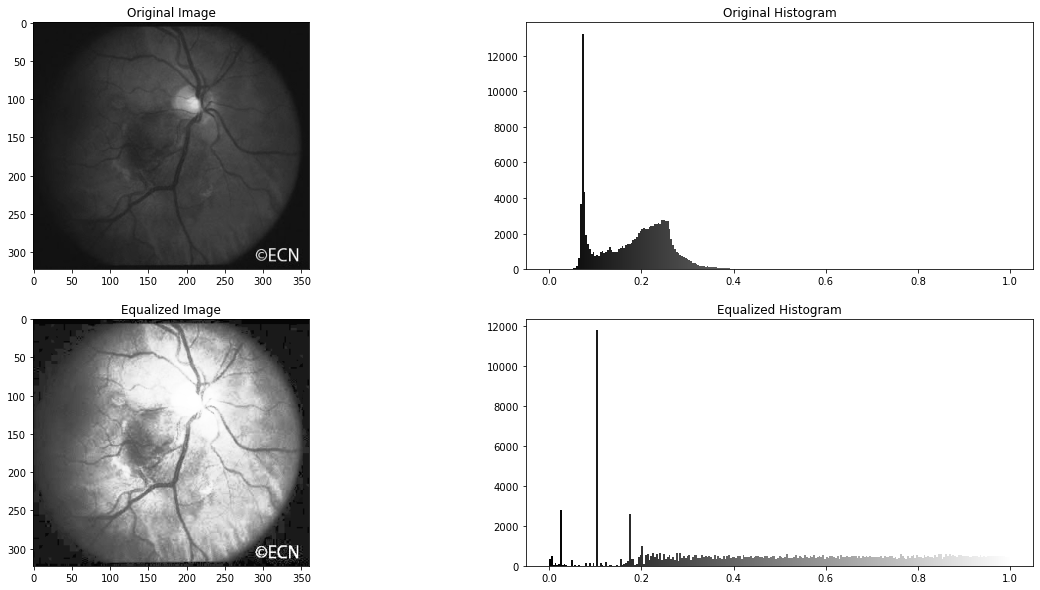

In [9]:
#Histogram Equalization on a grayscale image

from skimage import exposure

f, (ax1, ax2) = plt.subplots(2, 2,figsize=(20,10))

ax1[0].imshow(gray,cmap='gray')
ax1[0].set_title('Original Image')
N, bins, patches = ax1[1].hist(gray.ravel(), bins=255, range=(0, 1), color='gray');
ax1[1].set_title('Original Histogram')
# Stuff to make the histogram bars pretty
i = 0
for thispatch in patches:
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1

gray2 = exposure.equalize_hist(gray)  ##Function actually doing the histgoram equalization


ax2[0].imshow(gray2,cmap='gray')
ax2[0].set_title('Equalized Image')
N, bins, patches = ax2[1].hist(gray2.ravel(), bins=255, range=(0, 1), color='gray');
ax2[1].set_title('Equalized Histogram')
# Stuff to make the histogram bars pretty
i = 0
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1

### Color Histogram Equalization

Histogram equalization on color images can be completed in multiple ways. This section shows the following:

- Histogram Equalization across all channels in RGB.  (**Note the UserWarning**)
- Histogram Equalization across RGB channels independently.
- Histogram Equalization across the S and V channels in an HSV image:

/opt/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Text(0.5, 1.0, 'Equalized Histogram (Combined R,G,B)')

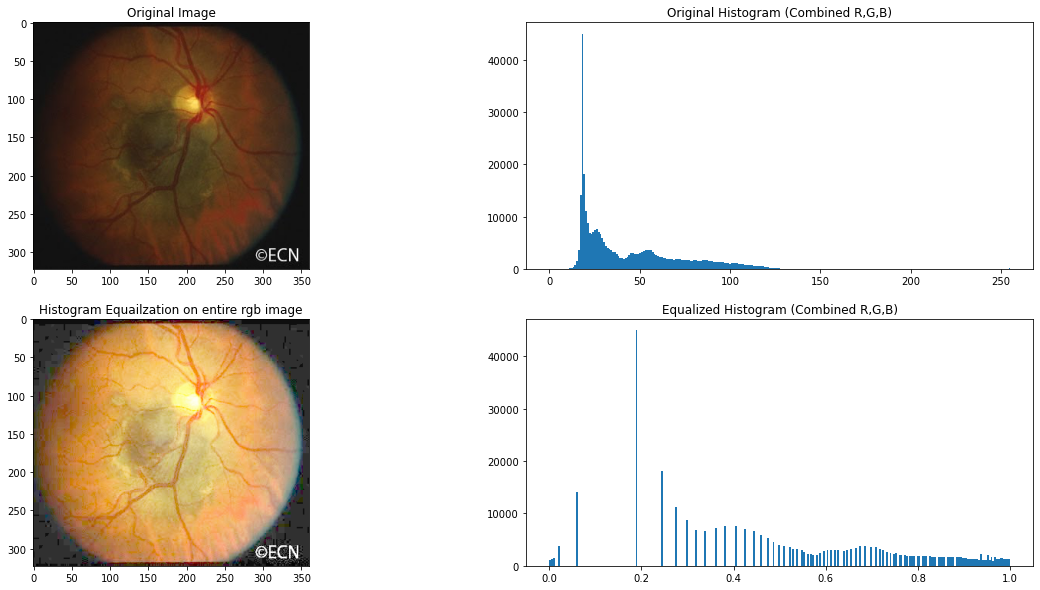

In [10]:
# Code snip-it to do do histogram equalization on an RGB image with R, B and G in the same histogram
im2 = exposure.equalize_hist(im)

f, (ax1, ax2) = plt.subplots(2, 2,figsize=(20,10))

ax1[0].imshow(im)
ax1[0].set_title('Original Image')

ax1[1].hist(im.ravel(),bins=256);
ax1[1].set_title('Original Histogram (Combined R,G,B)')

ax2[0].set_title('Histogram Equailzation on entire rgb image')
ax2[0].imshow(im2)
ax2[1].hist(im2.ravel(),bins=256);
ax2[1].set_title('Equalized Histogram (Combined R,G,B)')

&#9989; **<font color=red>DO THIS:</font>** Try the above again with a different image. Pick some images from the internet and see if you can improve constrast using histogram equalization.

---

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----